In [1]:
from tparton.m_evolution import evolve
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy.special import gamma
# From Gehrmann (https://arxiv.org/pdf/hep-ph/9512406)
n = 3000
x = np.power(10, np.linspace(np.log10(1/3000), 0, n))
x = np.concatenate(([0], x))

def A(a, b, g, rho):
    return (1 + g * a / (a + b + 1)) \
        * gamma(a) * gamma(b+1) / gamma(a + b + 1) \
        + rho * gamma(a + 0.5) * gamma(b + 1) / gamma(a + b + 1.5)

def pdf_u(x, eta_u=0.918, a_u=0.512, b_u=3.96, gamma_u=11.65, rho_u=-4.60):
    return eta_u / A(a_u, b_u, gamma_u, rho_u) * np.power(x, a_u) * np.power(1-x, b_u) * (1 + gamma_u * x + rho_u * np.sqrt(x))

def pdf_d(x, eta_d=-0.339, a_d=0.780, b_d=4.96, gamma_d=7.81, rho_d=-3.48):
    return pdf_u(x, eta_d, a_d, b_d, gamma_d, rho_d)

u = np.stack((x, pdf_u(x))).T
d = np.stack((x, pdf_d(x))).T
u_evolved = evolve(u, Q0_2=4, Q2=200, n_x=n, l_QCD=0.231, n_f=4, morp='minus', verbose=True, alpha_num=False)
d_evolved = evolve(d, Q0_2=4, Q2=200, n_x=n, l_QCD=0.231, n_f=4, morp='minus', verbose=True, alpha_num=False)

0.0003332222592469177 0.0163371149042137
0.0006664445184938354 0.026060423108984
0.000999666777740753 0.0318297566830496
0.0013328890369876708 0.0359000657566863
0.0016661112962345886 0.0391192779426613
0.001999333555481506 0.0418929389539221
0.002332555814728424 0.0443629520172201
0.0026657780739753416 0.0466092385200213
0.002999000333222259 0.0486944745040583
0.003332222592469177 0.0506066612623724
0.0036654448517160947 0.0523846927621848
0.003998667110963012 0.0540436018867836
0.00433188937020993 0.055596047542525
0.004665111629456848 0.05705308795015
0.004998333888703766 0.0584244964441352
0.005331556147950683 0.0597189681127206
0.005664778407197601 0.0609442408344659
0.005998000666444518 0.0621071591134152
0.006331222925691437 0.0632137846684543
0.006664445184938354 0.0642694468817605
0.006997667444185272 0.0652788721375051
0.007330889703432189 0.0662462068613034
0.007664111962679107 0.0671750988733049
0.007997334221926024 0.0680687963783801
0.008330556481172943 0.0689301569038373

(np.float64(0.001), np.float64(1.0), np.float64(0.0), np.float64(0.21))

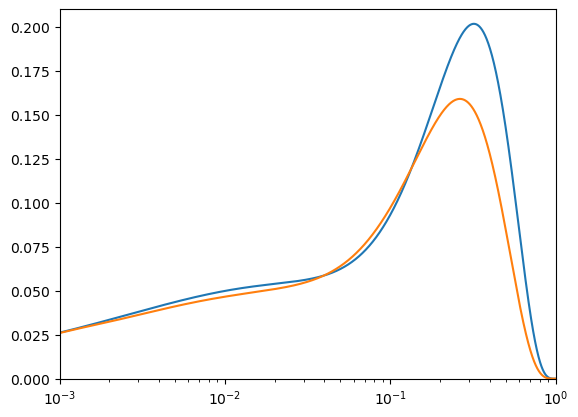

In [3]:
fig, ax = plt.subplots()
ax.plot(x, u[:,1]+d[:,1])
ax.plot(u_evolved[0], u_evolved[1]+d_evolved[1])
ax.set_xscale('log')
plt.axis([1e-3,1,0,0.21])

In [5]:
x = u[:,0]
y = u[:,1]-d[:,1]
diff = np.stack((x,y)).T
output_plus = evolve(diff, Q0_2=4, Q2=200, n_x=n, l_QCD=0.231, n_f=4, morp='plus', verbose=True, alpha_num=False)
output_minus = evolve(diff, Q0_2=4, Q2=200, n_x=n, l_QCD=0.231, n_f=4, morp='minus', verbose=True, alpha_num=False)

0.0003332222592469177 0.0187612210699257
0.0006664445184938354 0.0304890435284593
0.000999666777740753 0.0378238202253607
0.0013328890369876708 0.0432320060590155
0.0016661112962345886 0.0476522506852422
0.001999333555481506 0.0515381656698845
0.002332555814728424 0.0550518044627773
0.0026657780739753416 0.0583077328715949
0.002999000333222259 0.0613131916391893
0.003332222592469177 0.0641233847165894
0.0036654448517160947 0.0667618225908645
0.003998667110963012 0.0692470935693148
0.00433188937020993 0.071594878777946
0.004665111629456848 0.07381884783993
0.004998333888703766 0.0759310557102609
0.005331556147950683 0.077942235197317
0.005664778407197601 0.0798619091808697
0.005998000666444518 0.0816985278556999
0.006331222925691437 0.0834595982689176
0.006664445184938354 0.0851517222556064
0.006997667444185272 0.0867807852431402
0.007330889703432189 0.0883519651889007
0.007664111962679107 0.089869852504584
0.007997334221926024 0.0913385475766297
0.008330556481172943 0.0927616768541117


(0.0, 0.0002)

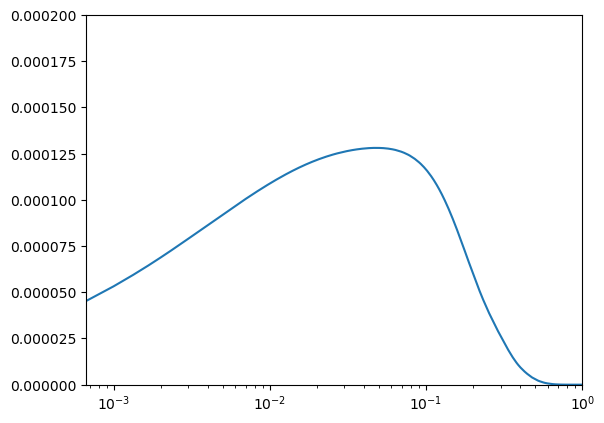

In [6]:
x = output_plus[0]
output = (output_plus[1] - output_minus[1]) / 2
plt.plot(x, output)
plt.xscale('log')
plt.xlim([2/3000, 1])
plt.ylim([0, 0.0002])

In [7]:
np.savez('vogelsang_approx.npz', x=x, upd=u[:,1]+d[:,1], evolved_x=u_evolved[0], u_evolved=u_evolved[1], d_evolved=d_evolved[1], output_plus=output_plus[1], output_minus=output_minus[1], output=output)